# importing the libriary

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


In [2]:
# from google.colab.patches import cv2.imshow

In [4]:
# loading MNIST data from keras datasets
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 42s 4us/step


In [5]:
type(X_train)

numpy.ndarray

In [6]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
# training data = 60000 data
# testing data = 10000 data
# dimension = 28,28
# grayscale image

In [8]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

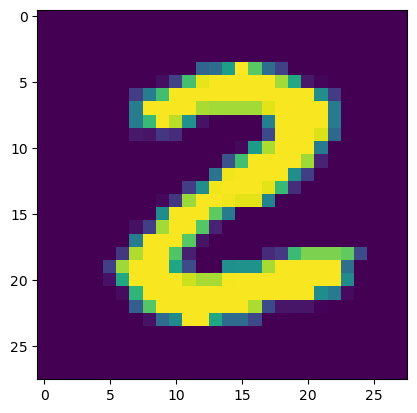

2


In [14]:
# displaying the image
plt.imshow(X_train[25])
plt.show()

# displaying the corresponding label

print(Y_train[25])

In [15]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


# all the images same dimension if not we have to resize all the images to a common dimension
# scaling the values


In [16]:
X_train = X_train/255

X_test = X_test/255

In [17]:
print(X_train[9])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [18]:
# building the neutral network
# setting up the layers of the neutral network

model = keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)), #input data
                        keras.layers.Dense(50,activation = 'relu'), # inner layer
                        keras.layers.Dense(50,activation = 'relu'), # inner layer
                        keras.layers.Dense(10,activation = 'sigmoid') # 10 means number shape of test value
])

In [19]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [20]:
# training the neural network

model.fit(X_train,Y_train,epochs =10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3108 - accuracy: 0.9110
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1460 - accuracy: 0.9562
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1059 - accuracy: 0.9681
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0862 - accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0703 - accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0599 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0519 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0456 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0409 - accuracy: 0.9865
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.034

# accuracy on test data

In [21]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1009 - accuracy: 0.9722
0.9721999764442444


In [22]:
print(X_test.shape)

(10000, 28, 28)


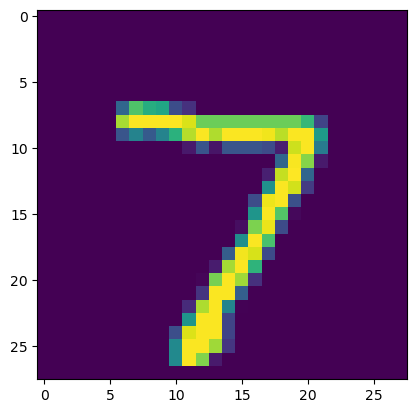

In [23]:
# first data point in X_test

plt.imshow(X_test[0])
plt.show()

In [24]:
print(Y_test[0])

7


In [25]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [26]:
print(y_pred.shape)

(10000, 10)


In [27]:
print(y_pred[0])

[3.9748934e-06 1.5651228e-01 9.5898700e-01 9.9441546e-01 8.2465280e-03
 4.9597784e-03 2.9194881e-13 1.0000000e+00 3.9421596e-02 8.0843121e-01]


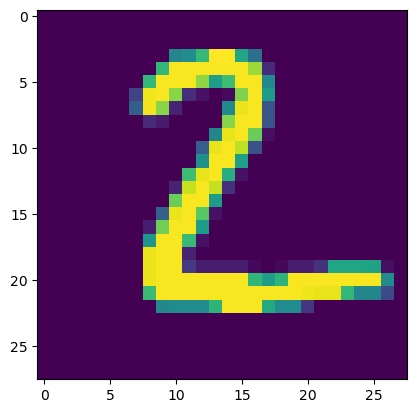

In [29]:
plt.imshow(X_test[1])
plt.show()

In [30]:
print(Y_test[1])

2


In [31]:
print(y_pred[1])

[7.0903043e-06 9.8089057e-01 1.0000000e+00 6.2783098e-01 7.7131926e-06
 6.0359275e-01 5.0872895e-03 9.8809265e-05 1.0722686e-01 1.6493364e-09]


# model predict () gives the predection proability of each class

In [33]:
# prediction proabilities to label
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [34]:
# prediction proabilities to label
label_for_first_test_image = np.argmax(y_pred[1])
print(label_for_first_test_image)

2


In [35]:
# prediction proabilities to label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 7, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

# Y_test -->True value
# y_pred_labels --> predict value

In [36]:
# confusion matrix
conf_mat = confusion_matrix(Y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 968    1    0    1    0    3    2    2    3    0]
 [   0 1123    3    1    0    2    2    1    3    0]
 [   3    3 1010    2    3    0    1    8    2    0]
 [   0    0    4  975    1   12    0    9    4    5]
 [   0    1    3    0  966    0    4    5    0    3]
 [   2    0    0    7    1  868    4    3    5    2]
 [   7    2    1    2    5   10  931    0    0    0]
 [   1    4    9    1    2    1    0 1008    0    2]
 [   8    0    6    5    8    7    4    6  927    3]
 [   1    3    0    1   30    4    1   22    0  947]], shape=(10, 10), dtype=int32)


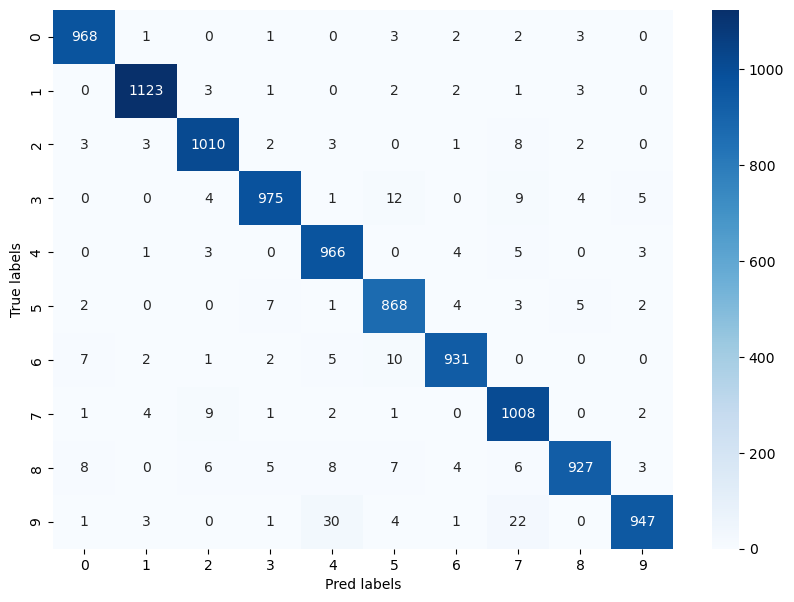

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat,annot = True,fmt='d',cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Pred labels')
plt.show()